# WeatherPy


In [164]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Get Current Date
now = datetime.datetime.now()
current_date = now.strftime("%Y/%m/%d")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [165]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [166]:
# Function get the weather for each city using the API
def get_weather_for_city(city_name):
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        'appid':'e6004f5aad94c0b785b9bf4e5f202995',
        'q': city_name,
        'units':'imperial'
    }
    try:
        resp = requests.get(base_url, params = params).json()
        longitude = resp.get('coord').get('lon')
        latitude = resp.get('coord').get('lat')        
        max_temp = resp.get('main').get('temp_max')
        cloudiness = resp.get('clouds').get('all')
        humidity = resp.get('main').get('humidity')
        wind_speed = resp.get('wind').get('speed')
        date = resp.get('dt')
        return {'city':city_name,
                'longitude':longitude,
                'latitude':latitude,
                'maximum_temperature':max_temp,
                'cloudiness': cloudiness,
                'date': date,
                'humidity': humidity,
                'wind_speed': wind_speed}
    except:
        return False


In [167]:
# Iterate through the list of cities, generating a list of dictionaries that contains
# the weather for each city. As a city is processed it is noted and a summary is 
# given at the end.
count = 0
city_weather = []
print('Beginning Data Retrieval')
print('-'*25)
for city in cities:
    if get_weather_for_city(city):
        count += 1
        print(f'Processing Record {count} of {len(cities)} | {city}')
        city_weather.append(get_weather_for_city(city))
    else:
        count += 1
        print('City not found. Skipping...')    
print('-'*25)
print('Data Retrieval Complete')
print('-'*25)
print(f"{len(city_weather)} city's weather recorded. {len(cities)-len(city_weather)} cities skipped.")


Beginning Data Retrieval
-------------------------
Processing Record 1 of 607 | fenoarivo
Processing Record 2 of 607 | bud
Processing Record 3 of 607 | dikson
Processing Record 4 of 607 | bluff
Processing Record 5 of 607 | ushuaia
Processing Record 6 of 607 | miyako
Processing Record 7 of 607 | castro
Processing Record 8 of 607 | bilma
City not found. Skipping...
Processing Record 10 of 607 | tynda
Processing Record 11 of 607 | orzhytsya
Processing Record 12 of 607 | lebu
Processing Record 13 of 607 | klaksvik
City not found. Skipping...
Processing Record 15 of 607 | hambantota
Processing Record 16 of 607 | mar del plata
Processing Record 17 of 607 | haines junction
Processing Record 18 of 607 | yar-sale
Processing Record 19 of 607 | yangambi
Processing Record 20 of 607 | longyearbyen
Processing Record 21 of 607 | iqaluit
Processing Record 22 of 607 | yakeshi
Processing Record 23 of 607 | narsaq
Processing Record 24 of 607 | caravelas
Processing Record 25 of 607 | rikitea
Processing Re

Processing Record 213 of 607 | bijie
Processing Record 214 of 607 | nicoya
Processing Record 215 of 607 | ust-nera
Processing Record 216 of 607 | waipawa
Processing Record 217 of 607 | ancud
Processing Record 218 of 607 | omboue
Processing Record 219 of 607 | martapura
City not found. Skipping...
Processing Record 221 of 607 | riviere-au-renard
Processing Record 222 of 607 | belaya gora
Processing Record 223 of 607 | ola
Processing Record 224 of 607 | acari
Processing Record 225 of 607 | kushima
Processing Record 226 of 607 | tabursuq
City not found. Skipping...
Processing Record 228 of 607 | saint george
City not found. Skipping...
Processing Record 230 of 607 | bonavista
Processing Record 231 of 607 | polczyn-zdroj
Processing Record 232 of 607 | svetlogorsk
Processing Record 233 of 607 | regeneracao
Processing Record 234 of 607 | marshall
Processing Record 235 of 607 | san pedro
Processing Record 236 of 607 | yantzaza
Processing Record 237 of 607 | manzhouli
Processing Record 238 of 

Processing Record 425 of 607 | havoysund
Processing Record 426 of 607 | ibi
Processing Record 427 of 607 | kununurra
Processing Record 428 of 607 | chernyshevskiy
Processing Record 429 of 607 | awbari
Processing Record 430 of 607 | roald
City not found. Skipping...
Processing Record 432 of 607 | namatanai
Processing Record 433 of 607 | quevedo
Processing Record 434 of 607 | saint-louis
Processing Record 435 of 607 | tezu
Processing Record 436 of 607 | kuching
City not found. Skipping...
Processing Record 438 of 607 | cayenne
Processing Record 439 of 607 | merritt island
Processing Record 440 of 607 | dwarka
City not found. Skipping...
Processing Record 442 of 607 | bermejo
Processing Record 443 of 607 | choma
Processing Record 444 of 607 | platanos
Processing Record 445 of 607 | palmer
Processing Record 446 of 607 | strezhevoy
Processing Record 447 of 607 | hilpoltstein
City not found. Skipping...
Processing Record 449 of 607 | luanda
Processing Record 450 of 607 | mananjary
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [168]:
# Export weather data as a CSV
city_weather_df.to_csv(output_data_file, header=True, index=False)

In [169]:
# Create data frame with weather data
city_weather_df = pd.DataFrame.from_records(city_weather)
city_weather_df.head(10)

,city,cloudiness,date,humidity,latitude,longitude,maximum_temperature,wind_speed
0,fenoarivo,75,1562884519,87,-18.93,47.44,60.80,5.82
1,bud,46,1562884519,93,62.91,6.91,57.20,13.87
2,dikson,78,1562884383,94,73.51,80.55,34.43,10.27
3,bluff,0,1562884520,37,-23.58,149.07,67.55,2.91
4,ushuaia,75,1562884521,93,-54.81,-68.31,37.40,20.80
5,miyako,75,1562884521,64,33.63,130.94,75.20,14.99
6,castro,75,1562884521,100,-42.48,-73.76,46.40,9.17
7,bilma,39,1562884522,8,18.69,12.92,91.85,5.35
8,tynda,4,1562884523,57,55.15,124.74,71.15,5.64
9,orzhytsya,20,1562884523,93,49.79,32.70,52.43,5.57


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

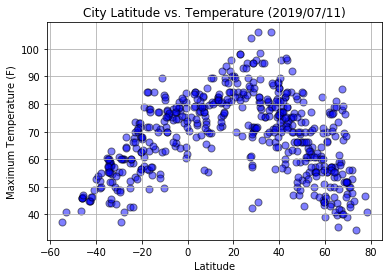

In [170]:
lat_temp_plot = city_weather_df.plot(kind = 'scatter', x='latitude', y='maximum_temperature', 
                                     grid = True, alpha = 0.5, edgecolor = 'black', 
                                     color = 'blue', s = 50)
plt.title(f'City Latitude vs. Temperature ({current_date})')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.savefig('lat_temp_plot.png', dpi=100)

#### Latitude vs. Humidity Plot

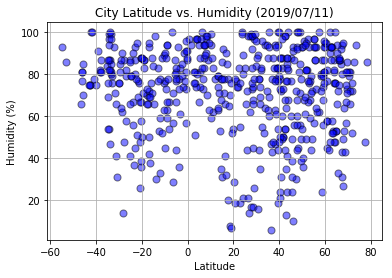

In [171]:
lat_temp_plot = city_weather_df.plot(kind = 'scatter', x='latitude', y='humidity', 
                                     grid = True, alpha = 0.5, edgecolor = 'black', 
                                     color = 'blue', s = 50)
plt.title(f'City Latitude vs. Humidity ({current_date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('lat_humidity_plot.png', dpi=100)

#### Latitude vs. Cloudiness Plot

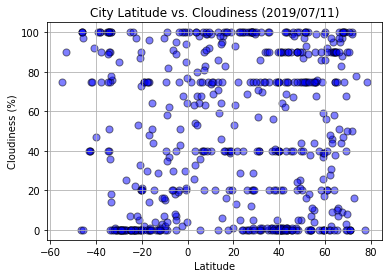

In [172]:
lat_temp_plot = city_weather_df.plot(kind = 'scatter', x='latitude', y='cloudiness', 
                                     grid = True,alpha = 0.5, edgecolor = 'black', 
                                     color = 'blue', s = 50)
plt.title(f'City Latitude vs. Cloudiness ({current_date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('lat_cloudiness_plot.png', dpi=100)

#### Latitude vs. Wind Speed Plot

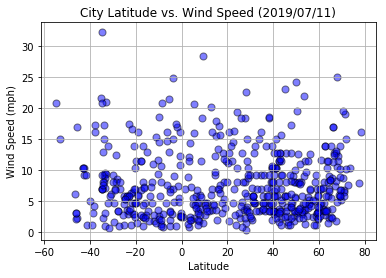

In [173]:
lat_temp_plot = city_weather_df.plot(kind = 'scatter', x='latitude', y='wind_speed', 
                                     grid = True, alpha = 0.5, edgecolor = 'black', 
                                     color = 'blue', s = 50)
plt.title(f'City Latitude vs. Wind Speed ({current_date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('lat_wind_plot.png', dpi=100)